In [2]:
import time
import numpy
import urllib
import scipy.optimize
import random
from collections import defaultdict
from collections import Counter
import string
from sklearn import linear_model
import ast
import importlib
import numpy as np
from scipy.spatial import distance
import random
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
nltk.download("averaged_perceptron_tagger")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Charlie/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
import as2_analysis_utils as as2_analysis

importlib.reload(as2_analysis)

<module 'as2_analysis_utils' from '/Users/Charlie/Documents/Work_School/UCSD/Grad/Fall_2020/CSE258/assignment2/as2_analysis_utils.py'>

In [4]:
data_all = list(as2_analysis.parseData_line("renttherunway_final_data.json"))

In [5]:
def extract_features(data_all, key):
    """
    return data of particualr key
    """
    return [d[key] for d in data_all]

In [6]:
ratings_all = extract_features(data_all,"rating")

In [7]:
ratings_all = [int(i) for i in ratings_all if i != "null"]

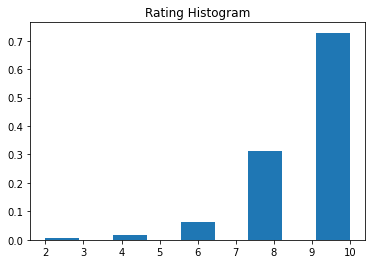

In [8]:
plt.hist(ratings_all,bins=9,density = True)
plt.title("Rating Histogram")
plt.savefig("Rating Histogram.pdf",bbox_inches="tight")

In [9]:
rating_fit = [int(d["rating"]) for d in data_all if d["fit"]=="fit" and d["rating"]!="null"]
rating_small = [int(d["rating"]) for d in data_all if d["fit"]=="small" and d["rating"]!="null"]
rating_large = [int(d["rating"]) for d in data_all if d["fit"]=="large" and d["rating"]!="null"]

In [10]:
def plot_hist(data,title="",bins=9):
    plt.hist(data,bins=9,density = True)
    plt.title(title)
    plt.savefig(title +".pdf",bbox_inches="tight")

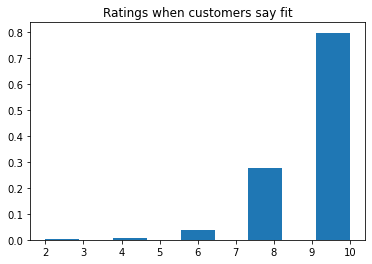

In [99]:
plot_hist(rating_fit,title="Ratings when customers say fit",bins=9)

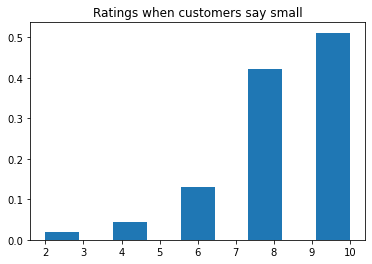

In [100]:
plot_hist(rating_small,title="Ratings when customers say small",bins=9)

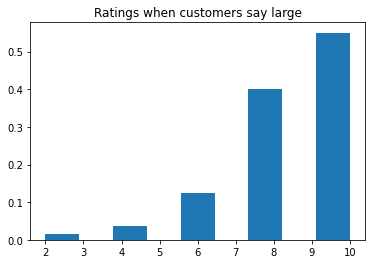

In [101]:
plot_hist(rating_large,title="Ratings when customers say large",bins=9)

In [102]:
data_rating_dict = defaultdict(list)
for d in data_all:
    rating = d["rating"]
    if rating != "null":
        data_str = d["review_date"]
        date_datatime =  datetime.strptime(data_str, '%B %d, %Y')
        
        key = (date_datatime.year,date_datatime.month)
        data_rating_dict[key].append(int(rating))

In [36]:
data_rating_avg = {key: np.mean(val) for key,val in data_rating_dict.items()}

In [38]:
data_rating_key = list(data_rating_avg.keys())

In [40]:
data_rating_key.sort()

In [42]:
data_avg = [data_rating_avg[month] for month in data_rating_key]

In [68]:
x_labels = ["{}-{}".format(i[0],i[1]) for i in data_rating_key[::8]]

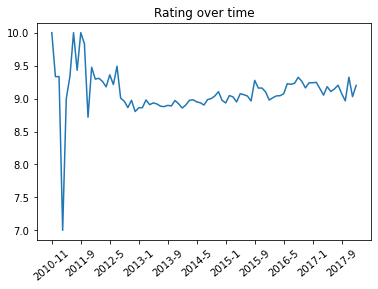

In [76]:
x = np.arange(0,len(data_avg),8)
fig,ax = plt.subplots(1,1) 
ax.plot(data_avg)

ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_labels, rotation=40, fontsize=10)
plt.title("Rating over time")
plt.savefig("Rating over time.pdf",bbox_inches = "tight")

In [82]:
data_fit_dict = defaultdict(list)
for d in data_all:
    rating = d["rating"]
    if rating != "null":
        data_str = d["review_date"]
        date_datatime =  datetime.strptime(data_str, '%B %d, %Y')
        fit = d["fit"]
        
        key = (date_datatime.year,date_datatime.month)
        data_fit_dict[key].append(fit)

In [90]:
fit_freq = {key:val.count("fit") for key,val in data_fit_dict.items()}
small_freq = {key:val.count("small") for key,val in data_fit_dict.items()}
big_freq = {key:val.count("large") for key,val in data_fit_dict.items()}

In [94]:
def return_values_sorted_date(data_dict,date):
    """
    date need to be sorted list of date
    """
    
    return [data_dict[month] for month in date]

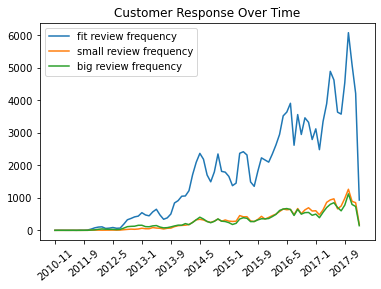

In [98]:
x = np.arange(0,len(data_avg),8)
fig,ax = plt.subplots(1,1) 

ax.plot(return_values_sorted_date(fit_freq,data_rating_key),label="fit review frequency")
ax.plot(return_values_sorted_date(small_freq,data_rating_key),label="small review frequency")
ax.plot(return_values_sorted_date(big_freq,data_rating_key),label="big review frequency")

plt.legend()
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_labels, rotation=40, fontsize=10)
plt.title("Customer Response Over Time")
plt.savefig("Customer Response Over Time.pdf",bbox_inches = "tight")

In [92]:
data_rating_key

[(2010, 11),
 (2011, 2),
 (2011, 3),
 (2011, 4),
 (2011, 5),
 (2011, 6),
 (2011, 7),
 (2011, 8),
 (2011, 9),
 (2011, 10),
 (2011, 11),
 (2011, 12),
 (2012, 1),
 (2012, 2),
 (2012, 3),
 (2012, 4),
 (2012, 5),
 (2012, 6),
 (2012, 7),
 (2012, 8),
 (2012, 9),
 (2012, 10),
 (2012, 11),
 (2012, 12),
 (2013, 1),
 (2013, 2),
 (2013, 3),
 (2013, 4),
 (2013, 5),
 (2013, 6),
 (2013, 7),
 (2013, 8),
 (2013, 9),
 (2013, 10),
 (2013, 11),
 (2013, 12),
 (2014, 1),
 (2014, 2),
 (2014, 3),
 (2014, 4),
 (2014, 5),
 (2014, 6),
 (2014, 7),
 (2014, 8),
 (2014, 9),
 (2014, 10),
 (2014, 11),
 (2014, 12),
 (2015, 1),
 (2015, 2),
 (2015, 3),
 (2015, 4),
 (2015, 5),
 (2015, 6),
 (2015, 7),
 (2015, 8),
 (2015, 9),
 (2015, 10),
 (2015, 11),
 (2015, 12),
 (2016, 1),
 (2016, 2),
 (2016, 3),
 (2016, 4),
 (2016, 5),
 (2016, 6),
 (2016, 7),
 (2016, 8),
 (2016, 9),
 (2016, 10),
 (2016, 11),
 (2016, 12),
 (2017, 1),
 (2017, 2),
 (2017, 3),
 (2017, 4),
 (2017, 5),
 (2017, 6),
 (2017, 7),
 (2017, 8),
 (2017, 9),
 (2017, 1